# Handling outliers

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

from matplotlib import pyplot as plt
import seaborn as sns



plt.style.use('ggplot')
#increase font size of all elements
# sns.set_theme(font_scale=1.5)


## Loading a dataset
[Dataset: House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

In [2]:
house_data = pd.read_csv(
    'data/kc_house_data.csv', 
    dtype=dict(
        # waterfront="int",
        # zipcode="str",
    ),
    parse_dates=[1])
house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

## Plot histograms


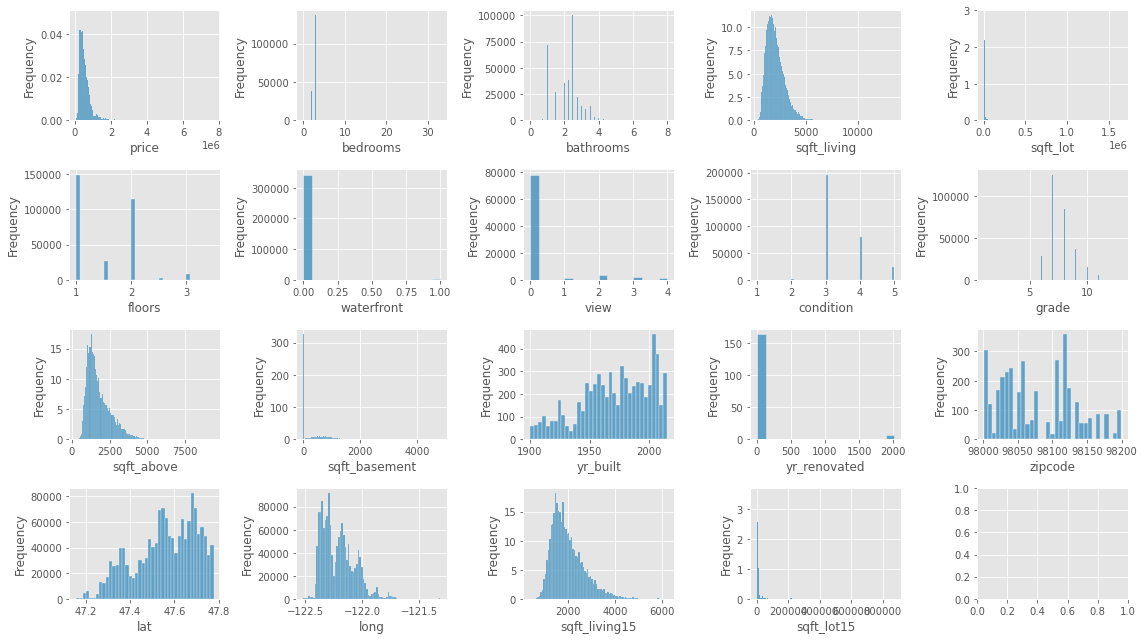

In [4]:
fig, axs = plt.subplots(4, 5, figsize=(16,9))
axs = axs.ravel()
_data=house_data.drop(columns=['id', 'date'])
for i, col in enumerate(_data):
    discrete = True if _data[col].dtype == np.int64 else False
    sns.histplot(
        data=_data, x=col, 
        # kde=True, 
        stat='frequency',
        # discrete=discrete, 
        ax=axs[i])
fig.tight_layout()


# fig  = plt.figure(figsize=(18,16), constrained_layout=True)
# subfigs = fig.subfigures(5,4)
# subfigs = subfigs.reshape([-1])
# for i, column in enumerate(_data.drop(columns=['price'])):
#     sfig = subfigs[i]
#     axs = sfig.subplots(2,1, gridspec_kw={'height_ratios':[0.7,0.3]}, sharex=True)
#     sns.histplot(data=_data, x=column,y='price', kde=True, ax=axs[0])
#     sns.boxplot(data=_data, x=column,y='price', width=0.5, ax=axs[1])

## Simple outlier detection using 1.5 IQR


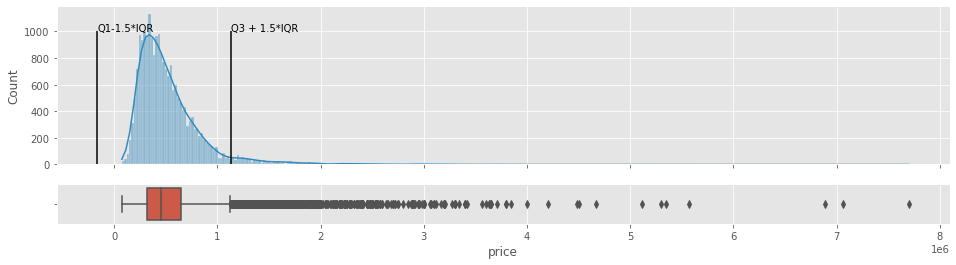

In [5]:
q1 = house_data.price.quantile(0.25, interpolation='nearest')
q3 = house_data.price.quantile(0.75, interpolation='nearest')
IQR = q3-q1
k = 1.5
lower, upper = q1-k*IQR, q3+k*IQR


fig, axs = plt.subplots(
    2,1, figsize=(16, 4),
    gridspec_kw={'height_ratios': [0.8, 0.2]}, sharex=True)
sns.histplot(house_data.price, kde=True, ax=axs[0])

plt.sca(axs[0])
plt.vlines([lower, upper], 0, 1000, colors='k')
plt.annotate(f'Q1-{k}*IQR',(lower,1000))
plt.annotate(f'Q3 + {k}*IQR',(upper,1000))

plt.sca(axs[1])
sns.boxplot(x=house_data.price);

## Trimming - removing outliers

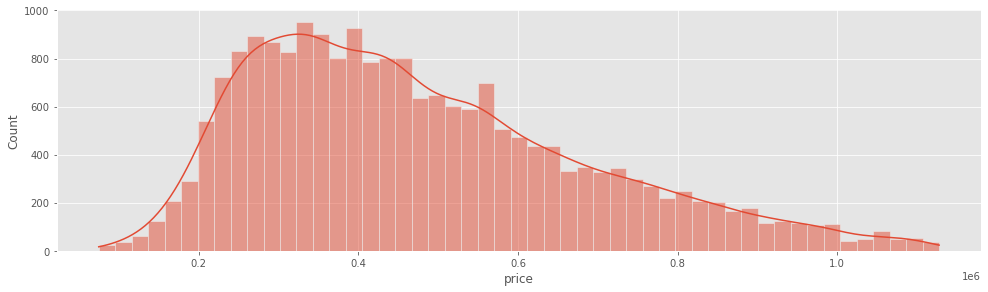

In [54]:
trim_mask = house_data.price.between(lower, upper)
trimmed_price = house_data.price[trim_mask]
sns.displot(trimmed_price, kde=True)
plt.gcf().set_size_inches(16, 4)

In [55]:
X = house_data.drop(columns=['id','price', 'date']).loc[trim_mask,:]
y = trimmed_price

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          2.353e+04
Date:                Wed, 12 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:12:30   Log-Likelihood:                     -2.6750e+05
No. Observations:               20467   AIC:                                  5.350e+05
Df Residuals:                   20450   BIC:                                  5.352e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -9483.0100   1132.195     -8.376      0.000   -1.17e+04   -7263.817
bathrooms      2.316e+04   1964.143     11.790      0.000    1.93e+04     2.7e+04
sqft_living      48.4536      1.463     33.113      0.000      45.585      51.322
sqft_lot          0.2307      0.029      8.062      0.000       0.175       0.287
floors         3.496e+04   2123.277     16.464      0.000    3.08e+04    3.91e+04
waterfront     1.192e+05   1.55e+04      7.691      0.000    8.88e+04     1.5e+05
view           3.131e+04   1384.901     22.606      0.000    2.86e+04     3.4e+04
condition      2.584e+04   1365.302     18.924      0.000    2.32e+04    2.85e+04
grade           7.24e+04   1296.201     55.858      0.000    6.99e+04    7.49e+04
sqft_above       23.5598      1.429     16.486      0.000      20.759      26.361
sqft_basement    24.8937      1.635     15.225      0.000      21.689      28.099
yr_built      -1844.9746     41.112    -44.877      0.000   -1925.556   -1764.393
yr_renovated     13.6555      2.252      6.063      0.000       9.241      18.070
zipcode        -292.2131     10.416    -28.055      0.000    -312.629    -271.797
lat            5.483e+05   6201.925     88.404      0.000    5.36e+05     5.6e+05
long          -4.711e+04   7614.180     -6.187      0.000    -6.2e+04   -3.22e+04
sqft_living15    46.6529      2.162     21.575      0.000      42.414      50.891
sqft_lot15       -0.1479      0.044     -3.387      0.001      -0.233      -0.062
==============================================================================
Omnibus:                     1661.213   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3027.236
Skew:                           0.579   Prob(JB):                         0.00
Kurtosis:                       4.486   Cond. No.                     3.76e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.46e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

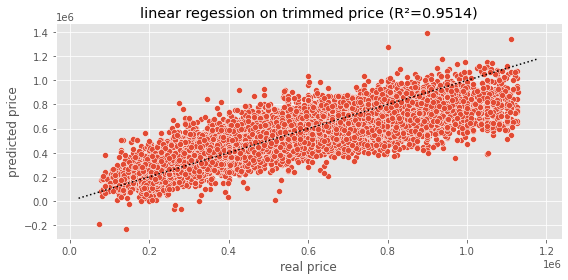

In [56]:
predictions = model.predict(X)  # make the predictions by the model
ax = plt.gca()
sns.scatterplot(x=y, y=predictions, ax=ax)
ax.plot(ax.get_xlim(),ax.get_xlim(), ':k')

ax.set_xlabel('real price (trimmed)')
ax.set_ylabel('predicted price')
ax.set_title(f'linear regession on trimmed price (R²={model.rsquared:0.4f})')
plt.gcf().set_size_inches(8,4)
plt.tight_layout()
plt.savefig('img/regression_trim.png')

## Recoding the price variable


### Winsorizing
Based on [Trimming vs. Winsorizing Outliers
An Overview of Each Approach, by Nick Gigliotti](https://ndgigliotti.medium.com/trimming-vs-winsorizing-outliers-e5cae0bf22cb)

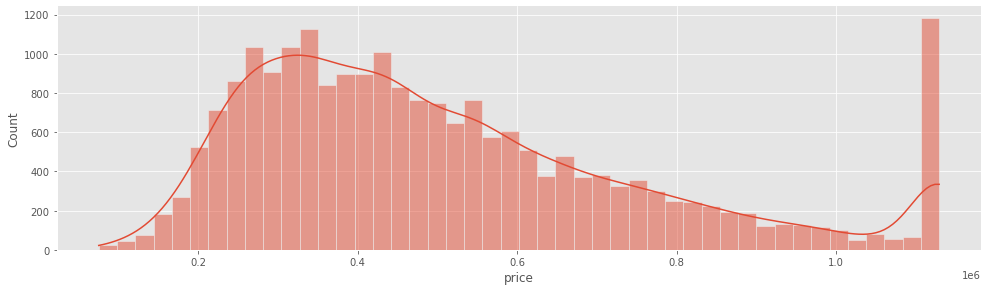

In [26]:
wins_price = house_data.price.clip(lower, upper)
sns.displot(wins_price, kde=True)
plt.gcf().set_size_inches(16, 4)

### Fitting a linear model to winsorized prices

In [60]:
X = house_data.drop(columns=['id','price', 'date'])
y = wins_price

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          2.483e+04
Date:                Wed, 12 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:16:25   Log-Likelihood:                     -2.8443e+05
No. Observations:               21613   AIC:                                  5.689e+05
Df Residuals:                   21596   BIC:                                  5.690e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -7067.9298   1179.387     -5.993      0.000   -9379.616   -4756.244
bathrooms      2.512e+04   2031.773     12.365      0.000    2.11e+04    2.91e+04
sqft_living      44.4418      1.417     31.374      0.000      41.665      47.218
sqft_lot          0.2141      0.030      7.161      0.000       0.155       0.273
floors         3.402e+04   2211.354     15.385      0.000    2.97e+04    3.84e+04
waterfront     9.441e+04   1.08e+04      8.708      0.000    7.32e+04    1.16e+05
view           3.372e+04   1328.992     25.370      0.000    3.11e+04    3.63e+04
condition      2.696e+04   1451.082     18.580      0.000    2.41e+04    2.98e+04
grade           8.03e+04   1339.729     59.934      0.000    7.77e+04    8.29e+04
sqft_above       22.1172      1.397     15.827      0.000      19.378      24.856
sqft_basement    22.3245      1.639     13.624      0.000      19.113      25.536
yr_built      -1895.5457     42.466    -44.637      0.000   -1978.782   -1812.310
yr_renovated     19.9572      2.277      8.765      0.000      15.494      24.420
zipcode        -350.2146     11.131    -31.463      0.000    -372.033    -328.397
lat            5.659e+05   6702.084     84.431      0.000    5.53e+05    5.79e+05
long          -8.706e+04   8156.105    -10.674      0.000   -1.03e+05   -7.11e+04
sqft_living15    53.7624      2.118     25.385      0.000      49.611      57.913
sqft_lot15       -0.1770      0.046     -3.870      0.000      -0.267      -0.087
==============================================================================
Omnibus:                     1845.996   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4400.299
Skew:                           0.523   Prob(JB):                         0.00
Kurtosis:                       4.948   Cond. No.                     4.65e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.01e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

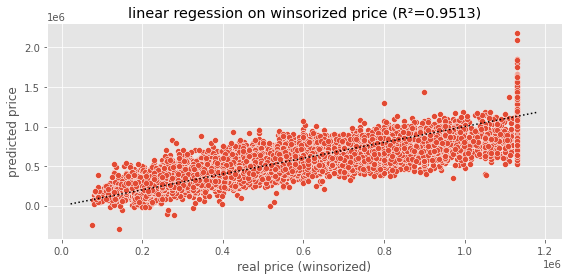

In [64]:
predictions = model.predict(X)  # make the predictions by the model
ax = plt.gca()
sns.scatterplot(x=y, y=predictions, ax=ax)
# sns.scatterplot(x=house_data.price[~trim_mask], y=predictions[~trim_mask], ax=ax)
ax.plot(ax.get_xlim(),ax.get_xlim(), ':k')

ax.set_xlabel('real price (winsorized)')
ax.set_ylabel('predicted price')
ax.set_title(f'linear regession on winsorized price (R²={model.rsquared:0.4f})')
plt.gcf().set_size_inches(8,4)
plt.tight_layout()
plt.savefig('img/regression_winsorized.png')

## Rescaling the price variable

For more info on transformations see: [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#)


In [29]:
from sklearn.preprocessing import minmax_scale,scale
from scipy.stats import boxcox


std_transf = scale(house_data.price.values.reshape([-1,1]))[:,0]
minmax_transf = minmax_scale(house_data.price.values.reshape([-1,1]))[:,0]
sqrt_transf = house_data.price.transform(np.sqrt)
log_transf = house_data.price.transform(np.log)
bc_prices, _ = boxcox(house_data.price)


df = pd.DataFrame(
    {'standardization' : std_transf,
     'MinMax scaling' : minmax_transf,
     'sqrt transformation' : sqrt_transf,
     'Log transformation' : log_transf,
     'Box-Cox' : bc_prices
    })

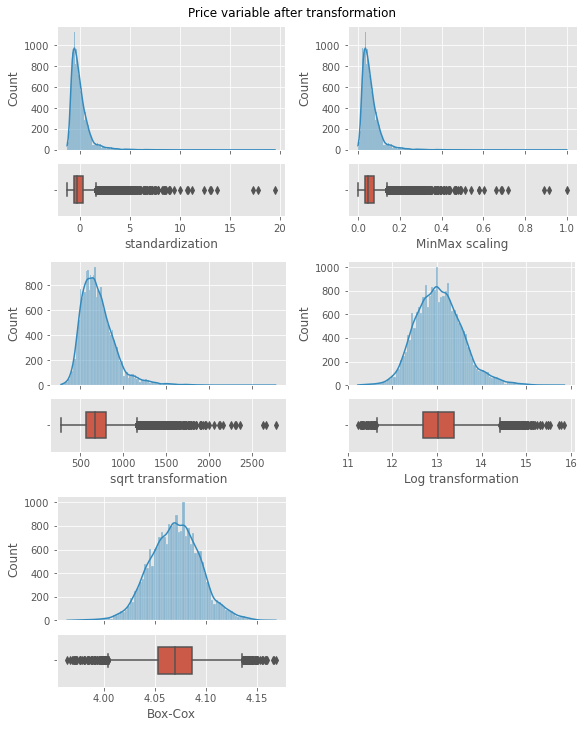

In [30]:
fig  = plt.figure(figsize=(8,10), constrained_layout=True)
fig.suptitle('Price variable after transformation')

subfigs = fig.subfigures(3,2)
subfigs=subfigs.reshape([-1])
for i, column in enumerate(df):
    sfig = subfigs[i]
    axs = sfig.subplots(2,1, gridspec_kw={'height_ratios':[0.7,0.3]}, sharex=True)
    sns.histplot(df, x=column, kde=True, ax=axs[0])
    sns.boxplot(data=df, x=column, width=0.5, ax=axs[1])

plt.savefig('img/data_transformation.png')

### Fit a linear model to Box-Cox transformed data


In [31]:
X = house_data.drop(columns=['id','price', 'date'])
y = bc_prices

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.392e+08
Date:                Wed, 12 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:00:08   Log-Likelihood:                          64394.
No. Observations:               21613   AIC:                                 -1.288e+05
Df Residuals:                   21596   BIC:                                 -1.286e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -8.444e-05      0.000     -0.731      0.465      -0.000       0.000
bathrooms         0.0033      0.000     16.533      0.000       0.003       0.004
sqft_living    3.765e-06   1.39e-07     27.151      0.000    3.49e-06    4.04e-06
sqft_lot       2.577e-08   2.93e-09      8.804      0.000       2e-08    3.15e-08
floors            0.0033      0.000     15.421      0.000       0.003       0.004
waterfront        0.0139      0.001     13.142      0.000       0.012       0.016
view              0.0023      0.000     17.672      0.000       0.002       0.003
condition         0.0035      0.000     24.416      0.000       0.003       0.004
grade             0.0071      0.000     54.313      0.000       0.007       0.007
sqft_above     1.537e-06   1.37e-07     11.233      0.000    1.27e-06     1.8e-06
sqft_basement  2.228e-06    1.6e-07     13.891      0.000    1.91e-06    2.54e-06
yr_built         -0.0001   4.16e-06    -29.057      0.000      -0.000      -0.000
yr_renovated   1.987e-06   2.23e-07      8.914      0.000    1.55e-06    2.42e-06
zipcode        5.205e-07   1.09e-06      0.478      0.633   -1.62e-06    2.66e-06
lat               0.0688      0.001    104.890      0.000       0.068       0.070
long             -0.0072      0.001     -9.049      0.000      -0.009      -0.006
sqft_living15   5.51e-06   2.07e-07     26.580      0.000     5.1e-06    5.92e-06
sqft_lot15    -6.026e-09   4.48e-09     -1.346      0.178   -1.48e-08    2.75e-09
==============================================================================
Omnibus:                     1115.947   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2215.500
Skew:                          -0.375   Prob(JB):                         0.00
Kurtosis:                       4.378   Cond. No.                     4.65e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.01e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

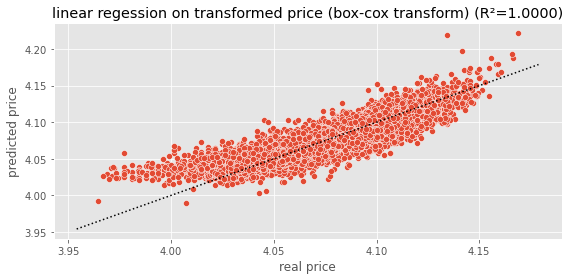

In [32]:
predictions = model.predict(X)  # make the predictions by the model
ax = plt.gca()
sns.scatterplot(x=y, y=predictions, ax=ax)
ax.plot(ax.get_xlim(),ax.get_xlim(), ':k')

ax.set_xlabel('real price')
ax.set_ylabel('predicted price')
ax.set_title(f'linear regession on transformed price (box-cox transform) (R²={model.rsquared:0.4f})')
plt.gcf().set_size_inches(8,4)
plt.tight_layout()
plt.savefig('regression_box-cox.png')

## Separate treatment

Exemple with a [linear regression from statsmodels](https://www.statsmodels.org/stable/regression.html)

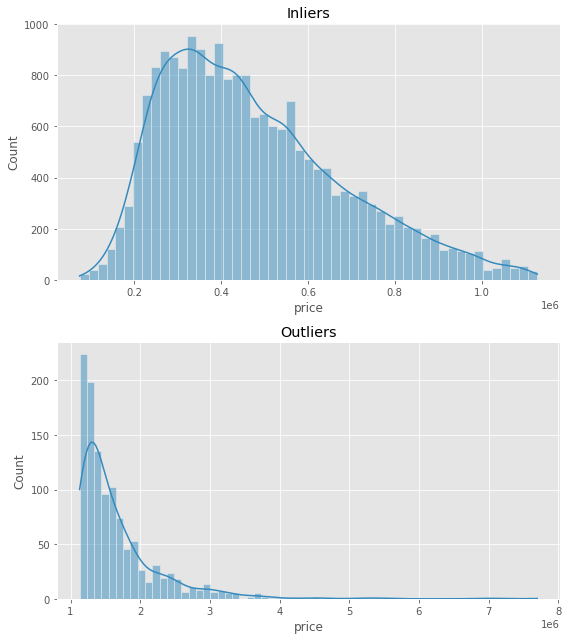

In [33]:
inliers = house_data.loc[trim_mask]
outliers = house_data.loc[~trim_mask]

fig, axs = plt.subplots(2,1, figsize=(8,9))
sns.histplot(inliers.price, kde=True, ax=axs[0])
axs[0].set_title('Inliers')

sns.histplot(outliers.price, kde=True, ax=axs[1])
axs[1].set_title('Outliers')
plt.tight_layout()
plt.savefig('hist_inliers_outliers.png')

### Fitting a single model to all data

In [34]:
import statsmodels.api as sm

X = house_data.drop(columns=['id','price', 'date'])
y = house_data.price

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.905
Method:                 Least Squares   F-statistic:                          1.211e+04
Date:                Wed, 12 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:00:09   Log-Likelihood:                     -2.9461e+05
No. Observations:               21613   AIC:                                  5.892e+05
Df Residuals:                   21596   BIC:                                  5.894e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -3.551e+04   1888.716    -18.802      0.000   -3.92e+04   -3.18e+04
bathrooms      4.105e+04   3253.759     12.618      0.000    3.47e+04    4.74e+04
sqft_living     110.2642      2.268     48.607      0.000     105.818     114.711
sqft_lot          0.1334      0.048      2.786      0.005       0.040       0.227
floors         5261.5471   3541.347      1.486      0.137   -1679.755    1.22e+04
waterfront     5.833e+05   1.74e+04     33.598      0.000    5.49e+05    6.17e+05
view           5.236e+04   2128.298     24.600      0.000    4.82e+04    5.65e+04
condition      2.721e+04   2323.818     11.709      0.000    2.27e+04    3.18e+04
grade          9.548e+04   2145.492     44.503      0.000    9.13e+04    9.97e+04
sqft_above       71.3928      2.238     31.902      0.000      67.006      75.779
sqft_basement    38.8714      2.624     14.813      0.000      33.728      44.015
yr_built      -2561.7953     68.006    -37.670      0.000   -2695.092   -2428.498
yr_renovated     20.4187      3.646      5.600      0.000      13.272      27.566
zipcode        -519.0756     17.826    -29.119      0.000    -554.016    -484.136
lat            6.022e+05   1.07e+04     56.106      0.000    5.81e+05    6.23e+05
long          -2.179e+05   1.31e+04    -16.683      0.000   -2.44e+05   -1.92e+05
sqft_living15    23.0994      3.392      6.811      0.000      16.452      29.747
sqft_lot15       -0.3761      0.073     -5.137      0.000      -0.520      -0.233
==============================================================================
Omnibus:                    18403.146   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1873534.498
Skew:                           3.572   Prob(JB):                         0.00
Kurtosis:                      48.049   Cond. No.                     4.65e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.01e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Fit two models for inliers and outliers

In [35]:
X_in = inliers.drop(columns=['id','price', 'date'])
y_in = inliers.price

X_out = outliers.drop(columns=['id','price', 'date'])
y_out = outliers.price

In [36]:
model_inliers = sm.OLS(y_in, X_in).fit()
# Print out the statistics
model_inliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                          2.353e+04
Date:                Wed, 12 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:00:10   Log-Likelihood:                     -2.6750e+05
No. Observations:               20467   AIC:                                  5.350e+05
Df Residuals:                   20450   BIC:                                  5.352e+05
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms      -9483.0100   1132.195     -8.376      0.000   -1.17e+04   -7263.817
bathrooms      2.316e+04   1964.143     11.790      0.000    1.93e+04     2.7e+04
sqft_living      48.4536      1.463     33.113      0.000      45.585      51.322
sqft_lot          0.2307      0.029      8.062      0.000       0.175       0.287
floors         3.496e+04   2123.277     16.464      0.000    3.08e+04    3.91e+04
waterfront     1.192e+05   1.55e+04      7.691      0.000    8.88e+04     1.5e+05
view           3.131e+04   1384.901     22.606      0.000    2.86e+04     3.4e+04
condition      2.584e+04   1365.302     18.924      0.000    2.32e+04    2.85e+04
grade           7.24e+04   1296.201     55.858      0.000    6.99e+04    7.49e+04
sqft_above       23.5598      1.429     16.486      0.000      20.759      26.361
sqft_basement    24.8937      1.635     15.225      0.000      21.689      28.099
yr_built      -1844.9746     41.112    -44.877      0.000   -1925.556   -1764.393
yr_renovated     13.6555      2.252      6.063      0.000       9.241      18.070
zipcode        -292.2131     10.416    -28.055      0.000    -312.629    -271.797
lat            5.483e+05   6201.925     88.404      0.000    5.36e+05     5.6e+05
long          -4.711e+04   7614.180     -6.187      0.000    -6.2e+04   -3.22e+04
sqft_living15    46.6529      2.162     21.575      0.000      42.414      50.891
sqft_lot15       -0.1479      0.044     -3.387      0.001      -0.233      -0.062
==============================================================================
Omnibus:                     1661.213   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3027.236
Skew:                           0.579   Prob(JB):                         0.00
Kurtosis:                       4.486   Cond. No.                     3.76e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 1.46e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [37]:
model_outliers = sm.OLS(y_out, X_out).fit()
# Print out the statistics
model_outliers.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              1112.
Date:                Wed, 12 Apr 2023   Prob (F-statistic):                        0.00
Time:                        16:00:10   Log-Likelihood:                         -16478.
No. Observations:                1146   AIC:                                  3.299e+04
Df Residuals:                    1129   BIC:                                  3.308e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms       -4.26e+04   1.64e+04     -2.602      0.009   -7.47e+04   -1.05e+04
bathrooms       1.19e+05   2.24e+04      5.325      0.000    7.52e+04    1.63e+05
sqft_living     167.8287     12.154     13.809      0.000     143.982     191.675
sqft_lot          0.8233      0.355      2.318      0.021       0.126       1.520
floors        -9.783e+04   3.13e+04     -3.128      0.002   -1.59e+05   -3.65e+04
waterfront     7.032e+05   5.28e+04     13.323      0.000       6e+05    8.07e+05
view           2.372e+04   1.01e+04      2.353      0.019    3936.517    4.35e+04
condition      3.032e+04   2.21e+04      1.374      0.170    -1.3e+04    7.36e+04
grade          8.149e+04   1.64e+04      4.961      0.000    4.93e+04    1.14e+05
sqft_above      145.2540     12.757     11.386      0.000     120.223     170.285
sqft_basement    22.5746     14.334      1.575      0.116      -5.549      50.699
yr_built      -3377.8793    530.725     -6.365      0.000   -4419.197   -2336.561
yr_renovated      9.6759     21.753      0.445      0.657     -33.006      52.358
zipcode       -4080.6316    254.061    -16.062      0.000   -4579.117   -3582.146
lat            1.537e+06   2.27e+05      6.770      0.000    1.09e+06    1.98e+06
long          -2.725e+06   1.91e+05    -14.274      0.000    -3.1e+06   -2.35e+06
sqft_living15    43.2439     18.931      2.284      0.023       6.100      80.388
sqft_lot15       -1.3740      0.545     -2.519      0.012      -2.444      -0.304
==============================================================================
Omnibus:                      282.931   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1427.692
Skew:                           1.051   Prob(JB):                    9.56e-311
Kurtosis:                       8.048   Cond. No.                     4.19e+17
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 7.3e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Predictions vs real values with single model or double model

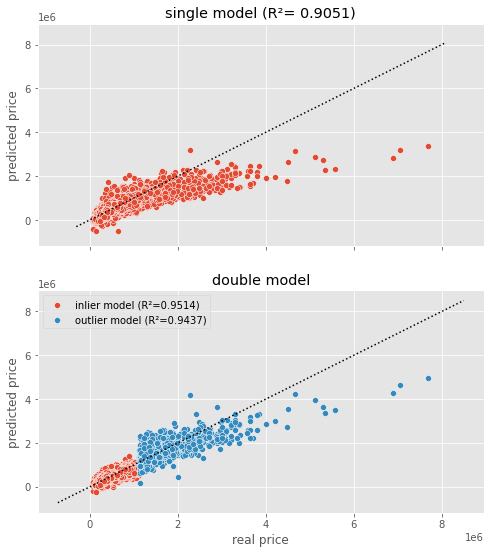

In [38]:
fig, axs = plt.subplots(2, 1, figsize=(8, 9), sharex=True, sharey=True)
predictions = model.predict(X)  # make the predictions by the model
ax = axs[0]
sns.scatterplot(x=y, y=predictions, ax=axs[0])
ax.plot(ax.get_xlim(),ax.get_xlim(), ':k')

ax.set_xlabel('real price')
ax.set_ylabel('predicted price')
ax.set_title(f'single model (R²= {model.rsquared:0.4f})')


ax = axs[1]
predictions = model_inliers.predict(X_in)  # make the predictions by the model
r2_in = model_inliers.rsquared
sns.scatterplot(x=y_in, y=predictions,
                label=f'inlier model (R²={r2_in:0.4f})', ax=axs[1])
# make the predictions by the model
predictions = model_outliers.predict(X_out)
r2_out = model_outliers.rsquared
sns.scatterplot(x=y_out, y=predictions,
                label=f'outlier model (R²={r2_out:0.4f})', ax=axs[1])
ax.plot(ax.get_xlim(),ax.get_xlim(), ':k')
ax.set_xlabel('real price')
ax.set_ylabel('predicted price')
ax.set_title('double model')
plt.savefig('img/separate_treatment.png')
